<a href="https://colab.research.google.com/github/Followb1ind1y/Machine_Learning_Algorithms/blob/main/ML_Algorithms_Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Algorithms: Support Vector Machine**

### **Support Vector Machine Basics**

**Support Vector Machine(SVM)** is a **supervised** machine learning algorithm which can be used for both **classification** or **regression** challenges. **Support Vectors** are data points that are **nearest to the hyperplane**. It influences the position and orientation of the hyperplane. Removing the support vectors will alter the position of the hyperplane. 

The **goal** is to learn a hyperplane that discriminates between classes; we find a decision boundary which maximum separation between two classes. **Margin** is the distance between the hyperplane and the closest points.

* **Hard Margin:** Classes are **linear separable**. We find a hyperplane with margin that maximally separates the two classes.

* **Soft Margin:** Classes are **not linear separable**. We allow error (slack) in the model fitting and find a decision boundary with the minimum slack required to discriminate between two classes.

* **Kernel Methods:** Classes are **not linear separable**. Converts a low-dimensional input space into a higher-dimensional space. Mapping the data into a new feature space. The data will be linearly separable in the. new space.

### **Hard Margin SVM**

If the data is **linear separable**, there exist an infinite number of hyperplanes that can separate the two classes. The algorithm looks for the **best hyperplane**; the one with **largest margin**.

* Hyperplane separating the two classes: $\beta^{T}x+\beta_{0}=0$
* Set the labels: $y_{i}\in\{-1,1\}$
* We can classify points as $\mathrm{sign}\{d_{i}\}$ where $d_{i} = \beta^{T}x_{i}+\beta_{0}$


**Goal:** Maximize the Magin:
$$
\mathrm{Margin} = \min\{y_{i}d_{i}\}, \ \ \ \ i=1,2,3,...,n \\
$$

The Maximize Magin problem can be reduced to:

$$
\min_{\beta,\beta_{0}}\frac{1}{2}{\parallel\beta\parallel}^{2} \\
\mathrm{Subject \ to} \ y_{i}(\beta^{T}x_{i}+\beta_{0}) \geq 1, i =1,2,...,n
$$

From the **Lagrangian Method**, we can have:

$$
\begin{align*}
L_{p}&=\frac{1}{2}{\parallel\beta\parallel}^{2}-\sum_{i=1}^{n}\alpha_{i}[ y_{i}(\beta^{T}x_{i}+\beta_{0})-1] \\
&= \frac{1}{2}\beta^{T}\beta - \beta^{T}\sum_{i=1}^{n}\alpha_{i}y_{i}x_{i}-\beta_{0}\sum_{i=1}^{n}\alpha_{i}y_{i}+\sum_{i=1}^{n}\alpha_{i}
\end{align*}
$$

Our **primal optimization problem** with the Lagrangian becomes the following: 

$$
\min_{\beta,\beta_{0}}(\max_{\alpha_{i}}L(\beta,\beta_{0},\alpha))
$$

The optimization function and the constraints meet some technical conditions such that we can do the following:

$$
\min_{\beta,\beta_{0}}(\max_{\alpha_{i}}L(\beta,\beta_{0},\alpha))=\max_{\alpha_{i}}(\min_{\beta,\beta_{0}}L(\beta,\beta_{0},\alpha))
$$

This allows us to take the partial derivatives of $L(\beta,\beta_{0},\alpha)$ with respect to $\beta$ and $\beta_{0}$, equate to zero and then plug the results back into the original equation of the Lagrangian, hence generating an equivalent **dual** optimization problem of the form

$$
\begin{align*}
&\max_{\alpha_{i}}(\min_{\beta,\beta_{0}}L(\beta,\beta_{0},\alpha)) \\
&\max_{\alpha_{i}}\sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}<x_{i},x_{j}> \\
&\mathrm{s.t.} \ \alpha_{i} \geq 0 \\
&\mathrm{s.t.} \ \sum_{i=1}^{n}\alpha_{i}y_{i}=0
\end{align*}
$$

From the complementary slackness (**KKT Conditions**), we have 

$$\alpha_{i}^{\star}g(x^{\star})=\alpha_{i}^{\star}[y_{i}(\beta^{T}x_{i}+\beta_{0})-1] = 0$$

* if $\alpha_{i}^{\star} > 0$, then $y_{i}(\beta^{T}x_{i}+\beta_{0})-1 = 0$, i.e. $x_{i}$ is on the margin. This point is called **support vector**.
* if $y_{i}(\beta^{T}x_{i}+\beta_{0}) > 1$, $x_{i}$ is not on the margin, and $\alpha_{i}^{⋆}=0$

This is a convex optimization and can be solved by quadratic programming. 

### **Soft Margin SVM**

Having a dataset with linear separable classes is very unlikely in practice, so we remove this requirement. We now consider a dataset where both classes overlap such that no hyperplane exists that can completely seperate the two classes on the training data. Instead, the **goal** becomes to find a hyperplane which **minimizes the amount of datapoints that "spill" over to the opposite sides**.

We allow points to violate our previous constraint by some error $\zeta$, but penalize the objective function the more it is violated. Our new optimization problem becomes:

$$
\min_{\beta,\beta_{0}}\frac{1}{2}{\parallel\beta\parallel}^{2}+\gamma\sum_{i=1}^{n}\zeta_{i} \\
\mathrm{Subject \ to} \ y_{i}(\beta^{T}x_{i}+\beta_{0}) \geq 1-\zeta_{i}, \forall i \\
\zeta_{i} \geq 0, \forall i
$$

We formulate the **lagrangian function**:

$$
L(\beta_{0},\beta,\alpha,\zeta,\lambda)=\frac{1}{2}{\parallel\beta\parallel}^{2}+\gamma\sum_{i=1}^{n}\zeta_{i}-\sum_{i=1}^{n}\alpha_{i}[y_{i}(\beta^{T}x_{i}+\beta_{0})-(1-\zeta_{i})] - \sum_{i=1}^{n}\lambda_{i}\zeta_{i}
$$

$$
\begin{align*}
\max\sum_{i=1}^{n}\alpha_{i} - &\frac{1}{2}\sum_{i=1}^{n}\sum_{j=1}^{n}\alpha_{i}\alpha_{j}y_{i}y_{j}<x_{i},{T}x_{j}> \\
&s.t. \ 0 \leq \alpha_{i} \leq \gamma \\
&s.t. \ 0 \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \\
\end{align*}
$$

From the complementary slackness (**KKT Conditions**), we have 

$$
\alpha_{i}g(x^{⋆})=\alpha_{i}[y_{i}(\beta^{T}x_{i}+\beta_{0})-(1-\zeta_{i})] = 0, \\
\lambda_{i}\zeta_{i}=0
$$

* if $\alpha_{i}^{⋆} > 0$, then $y_{i}(\beta^{T}x_{i}+\beta_{0}) = 1-\zeta_{i}$, $x_{i}$ is a **support vector**.
    * $\lambda_{i}>0$, then $\zeta_{i}=0$. This point is on the margin. We know that $\gamma - \alpha_{i}^{⋆} - \lambda_{i} = 0 \Rightarrow \alpha_{i}^{⋆} < \gamma$ 
    * $\zeta_{i}>0$, then $\lambda_{i}=0$. This point is over the margin.
    
* if $\alpha_{i}^{\star}=0$, then this point is NOT **support vector**.
$$
y_{i}(\beta^{T}x_{i}+\beta_{0})-(1-\zeta_{i})> 0 \\
y_{i}(\beta^{T}x_{i}+\beta_{0})> 1-\zeta_{i} \\
Since \ \gamma - \alpha_{i}^{⋆} - \lambda_{i} = 0 \ and \ \alpha_{i}^{\star}=0 \\ 
\Rightarrow \lambda_{i}=\gamma \Rightarrow \zeta_{i}=0 \\
\Rightarrow y_{i}(\beta^{T}x_{i}+\beta_{0})> 1\\
$$

This is a convex optimization and can be solved by quadratic programming. 

### **Kernel Methods**

**Kernels** or **kernel methods** (also called **Kernel functions**) are sets of different types of algorithms that are being used for pattern analysis. They are used to solve a **non-linear problem** by using a linear classifier. Kernels are a convenient way of **expanding the feature space**. The fact that kernels expand the feature space will not be obvious. The predicted value for a new vector x can be written as:

$$
\hat{f}(x) = \hat{\beta_{0}}+ \sum_{i\in S}\hat{\alpha_{i}}y_{i}<x,x_{i}>
$$
Where

* $x_{i}$ is a vector, $y_{i}$ is scalar(+1 or -1), $\alpha_{i}$ is a scalar.
* alpha’s are the Lagrange multipliers arising during optimization
* S is the set of support vectors, and
* the inner product $<.,.>$ is defined as $<x_{i},x_{i}'> = \sum_{j=1}^{p}x_{ij}x_{ij}'$

Remarkably, the solution depends only on the inner product of the observations, not on the observations themselves.

* **Classical Example**:

$$
\begin{align*}
<\phi(x),\phi(x')> &= (x^{2}_{1},x^{2}_{2}\sqrt{2}x_{1}x_{2})(x'^{2}_{1},x'^{2}_{2}\sqrt{2}x'_{1}x'_{2})^{T} \\
&= ((x_{1},x_{2}),(x'_{1},x'_{2})^{T})^{2} \\
&= <x,x'> \\
&=: K(x,x') \\
\end{align*}
$$

* **Linear Kernel**

$$
K(x_{i},x_{i}') = \ <x_{i},x_{i}'> \ = \sum_{j=1}^{d}x_{ij}x_{i'j}
$$

* No additional tuning parameters
* Nonlinear kernels have more flexibility, but this is not always needed

* **Polynomial Kernel**

$$
K(x_{i},x_{i}') = (1+ <x_{i},x_{i}'>)^{p} = (\beta_{0}+ \gamma\sum_{j=1}^{d}x_{ij}x_{i'j})^{p}
$$

* A polynomial kernel of order $d=2$ corresponds to adding all possible quadratic variables
* $\beta_{0}, \gamma>0$ and $d$ (>0, integer) are tuning parameters
* In practice, often $\beta_{0}=0$, $d=2$ or $d=3$ are often sufficient. Set $d=2$ or $d=3$ and tune gamma and $C$

* **Radial Basis function (RBF) Kernel (or Gaussian Kernel)**

$$
K(x_{i},x_{i}') = \exp(-\gamma\parallel x_{i}-x_{i}'\parallel^{2}) = \exp(-\gamma\sum_{j=1}^{d}(x_{ij}x_{i'j})^{2})
$$

* $\gamma>0$ is a tuning parameter
* The kernel is very small for points far apart
* Most popular choice
* It can be shown this kernel corresponds to an infinite number of $x$‐variables

### **Dataset Initialization**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
np.random.seed(0)
x_1, x_2 = np.random.rand(50, 1), np.random.rand(50, 1) + 0.6
y_1, y_2 = 3 + 3 * x_1 + np.random.rand(50, 1), 3 + 3 * x_1 + np.random.rand(50, 1) 
class_1, class_2 = np.concatenate((x_1, y_1), axis=1), np.concatenate((x_2, y_2), axis=1)
zeros, ones = np.zeros((50,1)), np.ones((50,1))
x = np.concatenate((class_1, class_2), axis=0)
y = np.concatenate((zeros, ones), axis=0)

Text(0, 0.5, 'X2')

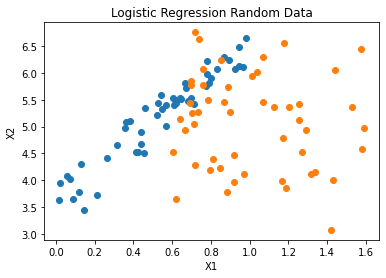

In [16]:
fig, ax = plt.subplots() 
ax.scatter(x_1,y_1) 
ax.scatter(x_2,y_2) 
ax.set_title('Logistic Regression Random Data')
ax.set_xlabel('X1') 
ax.set_ylabel('X2')

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

### **Implementing Radial Basis function (RBF) Kernel Support Vector Machine from scratch**